## REGRESIÓN LINEAL SIMPLE 
Por el método de mínimos cuadrados, utilizando tanto una implementación propia (en la que se calculó explícitamente los coeficientes b0 y b1​ del modelo y = b0​+b1*​x) como la implementación disponible en la librería scikit-learn.

In [49]:
# Librerías
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv("Tarea_RegresionSimple.csv")
df.head()


,Unnamed: 0,X,y
0,0,-50.000000,-57.346458
1,1,-49.665552,-54.727091
2,2,-49.331104,-43.279108
3,3,-48.996656,-44.108508
4,4,-48.662207,-49.139871


In [51]:
X = df["X"].values.astype(float)
y = df["y"].values.astype(float)

### Implementación Propia

In [52]:
x_mean = np.mean(X)
y_mean = np.mean(y)

b1 = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean)**2)
b0 = y_mean - b1 * x_mean

print(f"El coeficiente beta 1 es: {b1}")
print(f"El coeficiente beta 0 es: {b0}")

y_pred_propia = b0 + b1 * X

El coeficiente beta 1 es: 0.9768367903659358
El coeficiente beta 0 es: -0.48266485288179717


### Usando Scikit-learn

In [53]:
model = LinearRegression()
X_skl = X.reshape(-1, 1)

model.fit(X_skl, y)

print("\nscikit-learn:")
print("b1 =", model.coef_[0])
print("b0 =", model.intercept_)

y_pred = model.predict(X_skl)



scikit-learn:
b1 = 0.976836790365936
b0 = -0.48266485288179717


## SGD REGRESSOR

### Mi implementación

In [54]:
# Normalización
X_mean = np.mean(X)
X_std = np.std(X)
y_mean = np.mean(y)
y_std = np.std(y)

X_norm = (X - X_mean) / X_std
y_norm = (y - y_mean) / y_std

b0 = 0.0
b1 = 0.0

alpha = 1e-4
epochs = 5000
n = len(X_norm)

loss_history = []

for _ in range(epochs):
    y_hat = b0 + b1 * X_norm
    error = y_hat - y_norm

    loss = np.mean(error**2)
    loss_history.append(loss)

    db0 = (2/n) * np.sum(error)
    db1 = (2/n) * np.sum(error * X_norm)

    b0 -= alpha * db0
    b1 -= alpha * db1

print("Descenso de gradiente (desde cero):")
print("b0 =", b0)
print("b1 =", b1)

# Volver a escala original
b1_real = (b1 * y_std) / X_std
b0_real = y_mean + y_std * b0 - b1_real * X_mean

y_pred_gd = b0_real + b1_real * X


Descenso de gradiente (desde cero):
b0 = -5.752553988713725e-17
b1 = 0.6075569850863186


### Scikit learn

In [55]:
sgd = SGDRegressor(
    loss="squared_error",
    learning_rate="constant",
    eta0=1e-4,
    max_iter=5000,
    tol=1e-6,
    random_state=42
)

sgd.fit(X_skl, y)

print("SGDRegressor (scikit-learn):")
print("b0 =", sgd.intercept_[0])
print("b1 =", sgd.coef_[0])

y_pred_sgd = sgd.predict(X_skl)


SGDRegressor (scikit-learn):
b0 = -0.13832665981142103
b1 = 0.9603306625574249


In [56]:
print("=== MÉTRICAS ===")

print("Mínimos cuadrados (propio):")
print("MSE:", mean_squared_error(y, y_pred_propia))
print("MAE:", mean_absolute_error(y, y_pred_propia))

print("\nLinearRegression (sklearn):")
print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))

print("\nGD desde cero:")
print("MSE:", mean_squared_error(y, y_pred_gd))
print("MAE:", mean_absolute_error(y, y_pred_gd))

print("\nSGDRegressor:")
print("MSE:", mean_squared_error(y, y_pred_sgd))
print("MAE:", mean_absolute_error(y, y_pred_sgd))


=== MÉTRICAS ===
Mínimos cuadrados (propio):
MSE: 66.13741403315728
MAE: 6.504560069201652

LinearRegression (sklearn):
MSE: 66.1374140331573
MAE: 6.504560069201651

GD desde cero:
MSE: 174.45082754026149
MAE: 11.03214863175462

SGDRegressor:
MSE: 66.48454505631662
MAE: 6.537937349688586


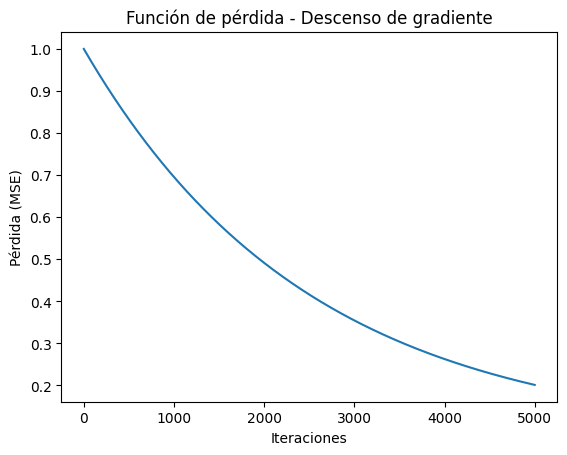

In [57]:
plt.plot(loss_history)
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida (MSE)")
plt.title("Función de pérdida - Descenso de gradiente")
plt.show()


### Interpretación gráfica, Función de Pérdida - Descenso de gradiente

La gráfica nos dice que el error promedio cuadrado va disminuyendo conforme aumentan las iteraciones, hasta llegar a un valor de .2, el cual es bastante bueno